# Covid-19_Outcome-Prediction

## Import the Libraries

In [139]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [140]:
# read the dataset
df = pd.read_csv('data.csv',index_col=[0])
df.head(6)

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
5,23,8,0,44.0,0,1,14,31,19,12,3,1,0,0


In [141]:
# get the dimensions of the dataset
df.shape

(863, 14)

In [142]:
# find the data types of the attributes
df.dtypes

location          int64
country           int64
gender            int64
age             float64
vis_wuhan         int64
from_wuhan        int64
symptom1          int64
symptom2          int64
symptom3          int64
symptom4          int64
symptom5          int64
symptom6          int64
diff_sym_hos      int64
result            int64
dtype: object

In [143]:
# concise summary of the data
df.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [144]:
# find if missing values is present
df.isnull().sum()

location        0
country         0
gender          0
age             0
vis_wuhan       0
from_wuhan      0
symptom1        0
symptom2        0
symptom3        0
symptom4        0
symptom5        0
symptom6        0
diff_sym_hos    0
result          0
dtype: int64

In [145]:
#visualize the features
df.columns.tolist()

['location',
 'country',
 'gender',
 'age',
 'vis_wuhan',
 'from_wuhan',
 'symptom1',
 'symptom2',
 'symptom3',
 'symptom4',
 'symptom5',
 'symptom6',
 'diff_sym_hos',
 'result']

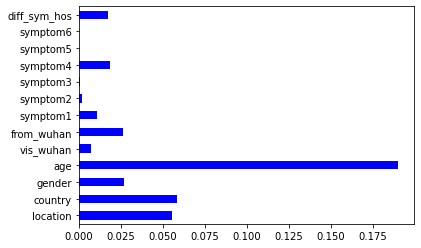

In [146]:
features = df.drop(columns=['result'])
value = df['result']
importances = mutual_info_classif(features , value)
feat_importances = pd.Series(importances, df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh', color = 'blue')
plt.show()

<AxesSubplot:xlabel='country', ylabel='age'>

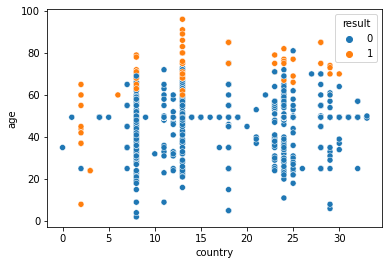

In [147]:
sns.scatterplot(data=df, x="country", y="age", hue="result")

<AxesSubplot:xlabel='age', ylabel='Count'>

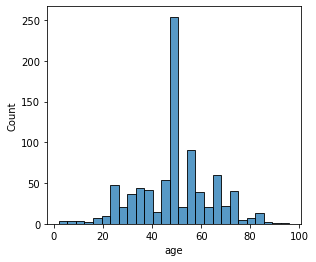

In [148]:
#Plot count of people infected with the age
f = plt.figure(figsize=(10,4))
f.add_subplot(1,2,1)
sns.histplot(df['age'])

#### People between the age fo 40 to 60 is the most people infected with corona virus

<AxesSubplot:xlabel='result', ylabel='count'>

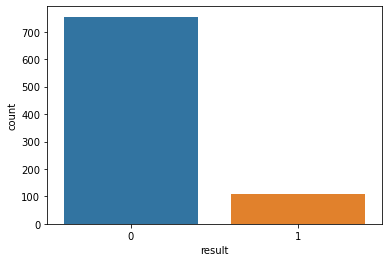

In [149]:
# get the distribution of the target variable
sns.countplot(x="result", data = df)

#### The result show that te number of people that recovered is much greater than the people that died

In [150]:
#one hot encoding data frame
one_hot_encoded_data = pd.get_dummies(df, columns = ['location', 'country', 'gender', 
                                                       'symptom1','symptom2','symptom3','symptom4',
                                                       'symptom5'])
new_df = one_hot_encoded_data
new_df

,age,vis_wuhan,from_wuhan,symptom6,diff_sym_hos,result,location_0,location_1,location_2,location_3,...,symptom4_7,symptom4_8,symptom4_9,symptom4_10,symptom4_11,symptom4_12,symptom5_0,symptom5_1,symptom5_2,symptom5_3
0,66.0,1,0,1,8,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,56.0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,46.0,0,1,1,13,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,60.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,58.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,24.0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
859,35.0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
860,49.4,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
861,49.4,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


# Modelling with K-Nearest Neighbors

In [151]:
#Import libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [152]:
#Split Data into training and testing set
xdat = new_df.drop(columns=['result'])
ydat = new_df['result']
xtr,xts,ytr,yts = train_test_split(xdat, ydat, test_size=0.3, random_state = 0)
print('Training set shape: ', xtr.shape, ytr.shape)
print('Testing set shape: ', xts.shape, yts.shape)

Training set shape:  (604, 275) (604,)
Testing set shape:  (259, 275) (259,)


In [153]:
#Function to get the best k
def getBest_k (x_data,y_data):
    rangeK= range(1, 40)
    scoresK = []
    for k in rangeK:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, x_data, y_data, cv=10, scoring='accuracy')
        scoresK.append(scores.mean())
    print(scoresK)
    plt.plot(rangeK, scoresK)
    plt.xlabel('Value of K')
    plt.ylabel('Accuracy')

[0.923589949211441, 0.9224137931034484, 0.9293638064688585, 0.930526597166533, 0.9363004544239507, 0.9282277465918204, 0.9270382250735099, 0.924712643678161, 0.924712643678161, 0.9246992782678429, 0.9246992782678427, 0.9258353381448812, 0.9293237102379044, 0.9270248596631918, 0.9316626570435712, 0.9258620689655173, 0.9351109329056403, 0.9258353381448812, 0.9304330392943063, 0.9246591820368886, 0.9269847634322375, 0.928147554129912, 0.9293103448275863, 0.922346966051858, 0.9269713980219192, 0.9246458166265704, 0.9269713980219192, 0.92928361400695, 0.9258086073242449, 0.929270248596632, 0.9304330392943065, 0.9315958299919809, 0.9304330392943065, 0.9315958299919809, 0.9304464047046246, 0.9304464047046246, 0.9304464047046246, 0.9292836140069503, 0.92928361400695]


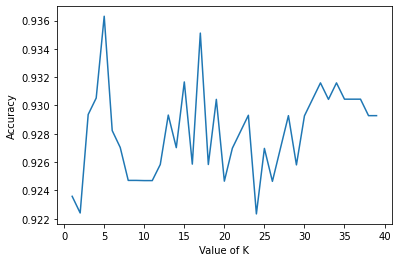

In [154]:
getBest_k (xdat,ydat)

### Best Value for K is 5

In [155]:
# Use the KNN classifier to fit data:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtr, ytr)
# Predict data with classifier: 
pred_y = knn.predict(xts)
#Print Accuracy_Score of the model
print('Accuracy: %.3f' % accuracy_score(yts, pred_y))

Accuracy: 0.931


 ### Comparing the performance of all classifiers using different metrics:

In [156]:
#Performance Classifiers
yts_score=knn.predict_proba(xts)
print('Precision: %.3f' % precision_score(yts, pred_y))
print('Recall: %.3f' % recall_score(yts, pred_y))
print('F1 Score: %.3f' % f1_score(yts, pred_y))
print('roc_auc_score: ',roc_auc_score(yts, yts_score[:,1]))

Precision: 0.788
Recall: 0.703
F1 Score: 0.743
roc_auc_score:  0.9428414901387874


In [157]:
#Classification Report
print(classification_report(yts, pred_y))
print('roc_auc_score: ',roc_auc_score(yts, yts_score[:,1]))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       222
           1       0.79      0.70      0.74        37

    accuracy                           0.93       259
   macro avg       0.87      0.84      0.85       259
weighted avg       0.93      0.93      0.93       259

roc_auc_score:  0.9428414901387874


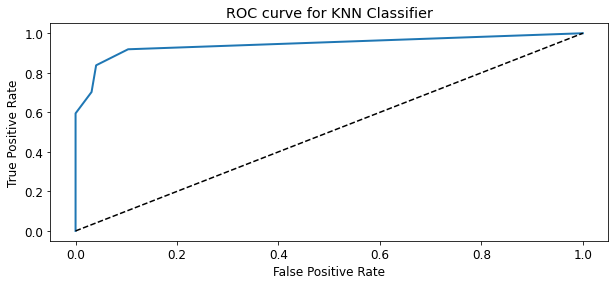

In [160]:
# plot ROC Curve
fpr, tpr, thresholds = roc_curve(yts, yts_score[:,1])
plt.figure(figsize=(10,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for KNN Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

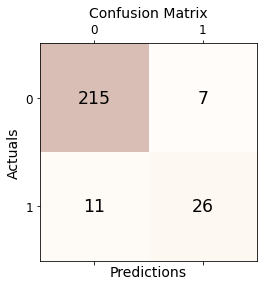

In [159]:
#Plot Confusion Matrix
cm = confusion_matrix(yts, pred_y)
fig, ax = plt.subplots(figsize=(10, 4))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='x-large')
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

#### True Positives = 215, True Negatives = 26, False Positives = 7, False Negatives = 11.